In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/content/vgsales.csv")

In [3]:
data = data.dropna()

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Publisher'] = le.fit_transform(data['Publisher'])

In [5]:
data= data.drop(['Platform','Rank','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
data = data.groupby(['Name','Publisher','Genre'], as_index=False).sum()


In [6]:
data

,Name,Publisher,Genre,Global_Sales
0,'98 Koshien,294,Sports,0.41
1,.hack//G.U. Vol.1//Rebirth,347,Role-Playing,0.17
2,.hack//G.U. Vol.2//Reminisce,347,Role-Playing,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),347,Role-Playing,0.16
4,.hack//G.U. Vol.3//Redemption,347,Role-Playing,0.17
...,...,...,...,...
11694,thinkSMART FAMILY!,99,Misc,0.03
11695,thinkSMART: Chess for Kids,315,Misc,0.01
11696,uDraw Studio,487,Misc,2.46
11697,uDraw Studio: Instant Artist,487,Misc,0.21


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data.drop(['Name','Genre'],axis = 1))

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=2)
clusters = km.fit_predict(scaled)
print("Silhouette score for 2 clusters: %0.3f" %silhouette_score(scaled, clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

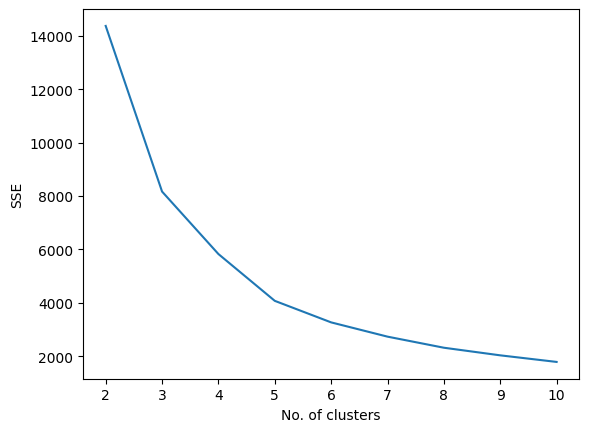

In [13]:
# Elbow method to find optimal K
sse = []
for k in range(2, 11):
  km = KMeans(n_clusters=k)
  km.fit(scaled)
  sse.append(km.inertia_)

plt.plot(range(2, 11), sse)
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.show()

In [14]:
# Evaluate optimal K
km = KMeans(6) # elbow shows optimal K is 6
clusters = km.fit_predict(scaled)
print("Silhouette score for 6 clusters: %0.3f" %silhouette_score(scaled, clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.563


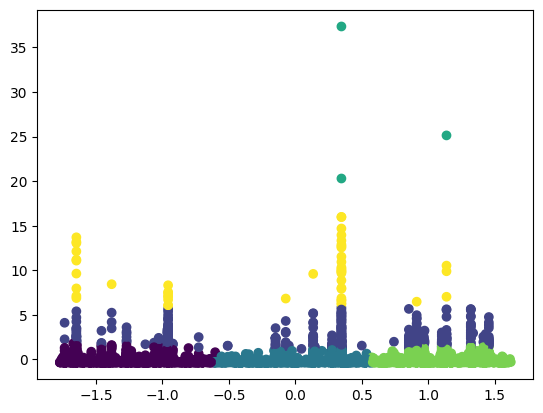

In [16]:
# Visualize clusters
plt.scatter(scaled[:,0], scaled[:,1], c=clusters)
plt.show()